In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
!pip install sqlalchemy
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent


('2017-08-23')

2016-08-23


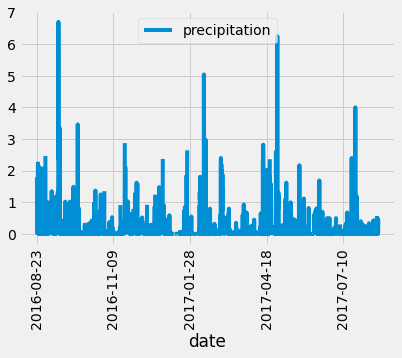

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column


#data = engine.execute("SELECT Measurement.date, Measurement.prcp FROM Measurement where Measurement.date <= '2017-08-23' and Measurement.date > '2016-08-24'")
prev_year = dt.date(2017,8,23) - dt.timedelta(days=365)
print(prev_year)
data2 = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date>=prev_year).all()
      

# # Save the query results as a Pandas DataFrame and set the index to the date column

df2 = pd.DataFrame(data2, columns = ["date", "precipitation"])
df2.head(-1)
df2 = df2.sort_values("date") 
df2.set_index("date")

# # Sort the dataframe by date


# # Use Pandas Plotting with Matplotlib to plot the data
df2.plot(x='date',y='precipitation', rot=90)

plt.show()



In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [32]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [33]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
# List the stations and the counts in descending order.
station
                                                                                          


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

active_st = engine.execute("SELECT Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs  from Measurement WHERE Measurement.station='USC00519281'")
active_results = pd.DataFrame(active_st, columns = ["station", "date", "precipitation", "temp"])
active_results.head()

low_temp = active_results['temp'].min()
hi_temp = active_results['temp'].max()
avg_temp = active_results['temp'].mean()

print(f'Lowest temp is {low_temp}')
print(f'Highest temp is {hi_temp}')
print(f'Average temp is {avg_temp:0.2f}')


Lowest temp is 54.0
Highest temp is 85.0
Average temp is 71.66


Text(0, 0.5, 'Frequency')

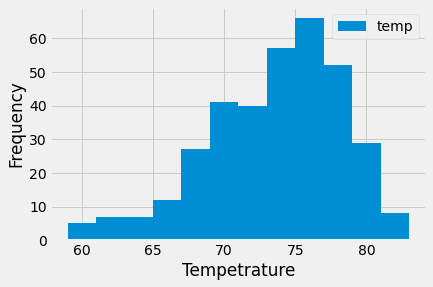

In [35]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#do a fresh query to get the data
only_st = session.query(Measurement.tobs).\
filter(Measurement.station=='USC00519281').\
filter(Measurement.date>prev_year).all()

results2 = pd.DataFrame(only_st, columns = ["temp"])
results2.head()
results2.plot.hist(bins=12)
plt.xlabel("Tempetrature")
plt.ylabel("Frequency")


# Close session

In [ ]:
# Close Session
session.close()